In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data=pd.read_csv('advertising.csv')

In [26]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [27]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [29]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

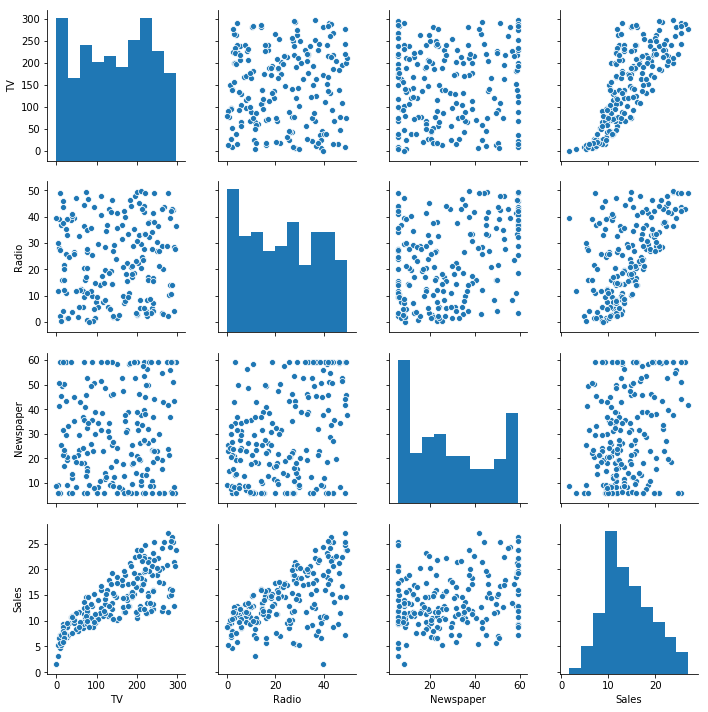

In [73]:
sns.pairplot(data)

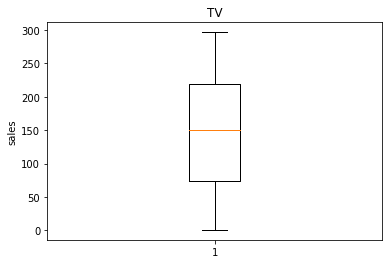

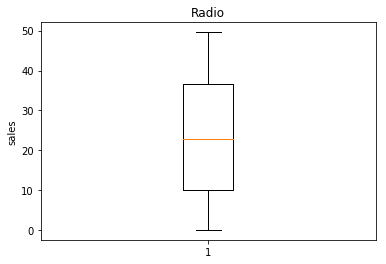

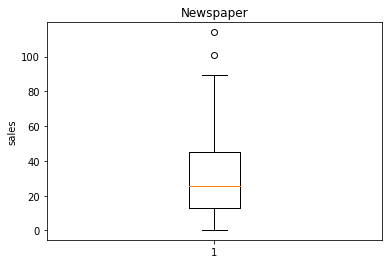

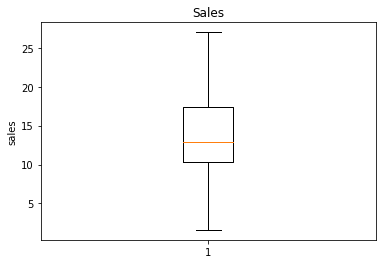

In [30]:
#to check the outlayers
for i in data:
    plt.boxplot(data[i])
    plt.gca().set(title=i, ylabel=i)
    plt.show()

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


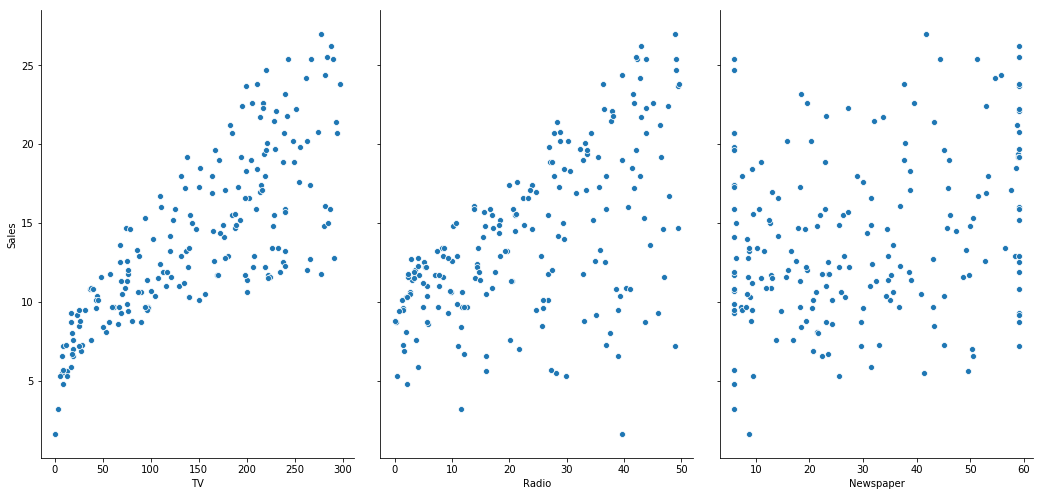

In [75]:
#to know the correlation
sns.pairplot(data ,x_vars=['TV','Radio','Newspaper'], y_vars='Sales',size=7, aspect=0.7, kind='scatter')

In [31]:
#outlayers treatment
percentiles = data['Newspaper'].quantile([0.1,0.9]).values
data['Newspaper']=data['Newspaper'].clip(percentiles[0],percentiles[1])

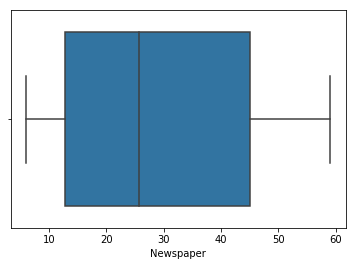

In [32]:
sns.boxplot(data['Newspaper'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28928c96c88>,
 'caps': [<matplotlib.lines.Line2D at 0x28928ca0358>,
 'boxes': [<matplotlib.lines.Line2D at 0x28928c96860>],
 'medians': [<matplotlib.lines.Line2D at 0x28928ca09e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x28928ca0d30>],
 'means': []}

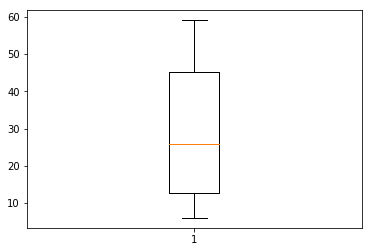

In [33]:
plt.boxplot(data['Newspaper'])

In [34]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,59.07,22.1
1,44.5,39.3,45.10,10.4
2,17.2,45.9,59.07,9.3
3,151.5,41.3,58.50,18.5
4,180.8,10.8,58.40,12.9
5,8.7,48.9,59.07,7.2
6,57.5,32.8,23.50,11.8
7,120.2,19.6,11.60,13.2
8,8.6,2.1,5.99,4.8
9,199.8,2.6,21.20,10.6


In [35]:
#standardize the data
def standardize(x):
    return (x-np.mean(x)/np.std(x))

In [36]:
data1= data.copy()

In [37]:
data1=data1.apply(standardize)

In [38]:
Y=data1['Sales']
del data1['Sales']
X=data1.copy()

In [44]:
data1.head()

,TV,Radio,Newspaper
0,228.383003,36.229132,57.44804
1,42.783003,37.729132,43.47804
2,15.483003,44.329132,57.44804
3,149.783003,39.729132,56.87804
4,179.083003,9.229132,56.77804


In [49]:
#splitting the data into train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y,test_size = 0.3, random_state=0)

In [50]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(140, 3)
(140,)
(60, 3)
(60,)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
Lr=LinearRegression()
model=Lr.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
r2_Score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)

3.6781694185403455
0.8653859164261078
0.5648137202995436


array([0.0439178 , 0.20005361, 0.00259049])

In [55]:
#mean square error
mse

3.6781694185403455

In [56]:
r2_Score

0.8653859164261078

In [57]:
Lr.intercept_

0.5648137202995436

In [60]:
# Let's see the coefficient
coeff_df = pd.DataFrame(Lr.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.043918
Radio,0.200054
Newspaper,0.002590


In [72]:
#calculating the p-value using the stats model
import statsmodels.api as sm
X_sm=sm.add_constant(X_train)
Xt_sm=sm.add_constant(X_test)
model=sm.OLS(Y_train,X_sm).fit()
Y_pred=model.predict(Xt_sm)
r2_Score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
print(r2_Score)
print(mse)
model.summary()

0.8653859164261077
3.678169418540347


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     440.0
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           8.60e-70
Time:                        18:32:30   Log-Likelihood:                -262.39
No. Observations:                 140   AIC:                             532.8
Df Residuals:                     136   BIC:                             544.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5648      0.357      1.582      0.116      -0.141       1.271
TV             0.0439      0.002     27.106      0.000       0.041       0.047
Radio          0.2001      0.009     21.414      0.000       0.182       0.219
Newspaper      0.0026      0.008      0.327      0.744      -0.013       0.018
==============================================================================
Omnibus:                       10.942   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.903
Skew:                          -0.714   Prob(JB):                      0.00260
Kurtosis:                       2.960   Cond. No.                         466.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
#news paper as high p value remove it
del X_sm['Newspaper']
del Xt_sm['Newspaper']

In [78]:
model=sm.OLS(Y_train,X_sm).fit()
Y_pred=model.predict(Xt_sm)
r2_Score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
print(r2_Score)
print(mse)
model.summary()

0.8656552691810042
3.6708096754915


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     664.3
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           3.11e-71
Time:                        18:37:04   Log-Likelihood:                -262.45
No. Observations:                 140   AIC:                             530.9
Df Residuals:                     137   BIC:                             539.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6068      0.332      1.827      0.070      -0.050       1.263
TV             0.0440      0.002     27.341      0.000       0.041       0.047
Radio          0.2010      0.009     22.690      0.000       0.183       0.219
==============================================================================
Omnibus:                       11.060   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.061
Skew:                          -0.719   Prob(JB):                      0.00240
Kurtosis:                       2.956   Cond. No.                         431.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

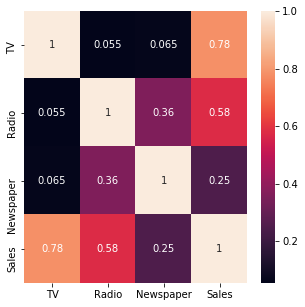

In [79]:
plt.figure(figsize = (5,5))
sns.heatmap(data.corr(),annot = True)

Text(0, 0.5, 'Sales')

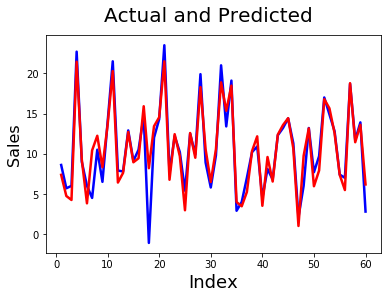

In [80]:
#Actual vs Predicted
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,Y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                               # Y-label

Text(0, 0.5, 'ytest-ypred')

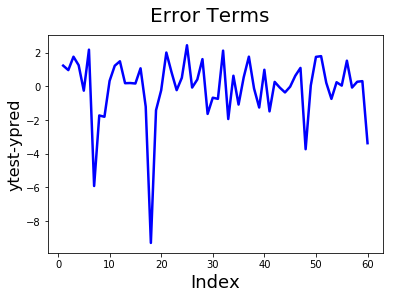

In [82]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,Y_test-Y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [83]:
Y_test.head()

18      8.605643
170     5.705643
107     6.005643
98     22.705643
177     9.005643
Name: Sales, dtype: float64

In [84]:
Y_pred.head()

18      7.378425
170     4.745410
107     4.250411
98     21.454738
177     9.266403
dtype: float64

In [85]:
#once again build model using normalize the data
data2=data.copy()
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
data2 = data2.apply(normalize) 

In [87]:
Y=data2['Sales']
del data2['Sales']
X=data2.copy()

In [88]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y,test_size = 0.3, random_state=0)
Lr=LinearRegression()
model=Lr.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
r2_Score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)

In [89]:
Lr.intercept_

0.05163635953041845

In [90]:
r2_Score

0.8653859164261078

In [91]:
mse

0.005701174001085535

In [93]:
pd.DataFrame(Lr.coef_,X_test.columns,columns=['Coefficient'])

,Coefficient
TV,0.511279
Radio,0.390656
Newspaper,0.005414


In [94]:
#calculating the p-value using the stats model
X_sm=sm.add_constant(X_train)
Xt_sm=sm.add_constant(X_test)
model=sm.OLS(Y_train,X_sm).fit()
Y_pred=model.predict(Xt_sm)
r2_Score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
print(r2_Score)
print(mse)
model.summary()

0.8653859164261077
0.00570117400108554


C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     440.0
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           8.60e-70
Time:                        18:50:02   Log-Likelihood:                 190.47
No. Observations:                 140   AIC:                            -372.9
Df Residuals:                     136   BIC:                            -361.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0516      0.014      3.711      0.000       0.024       0.079
TV             0.5113      0.019     27.106      0.000       0.474       0.549
Radio          0.3907      0.018     21.414      0.000       0.355       0.427
Newspaper      0.0054      0.017      0.327      0.744      -0.027       0.038
==============================================================================
Omnibus:                       10.942   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.903
Skew:                          -0.714   Prob(JB):                      0.00260
Kurtosis:                       2.960   Cond. No.                         5.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
#news paper as high p value remove it
del X_sm['Newspaper']
del Xt_sm['Newspaper']

In [96]:
model=sm.OLS(Y_train,X_sm).fit()
Y_pred=model.predict(Xt_sm)
r2_Score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
print(r2_Score)
print(mse)
model.summary()

0.8656552691810044
0.005689766376544571


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     664.3
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           3.11e-71
Time:                        18:51:06   Log-Likelihood:                 190.42
No. Observations:                 140   AIC:                            -374.8
Df Residuals:                     137   BIC:                            -366.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0528      0.013      3.932      0.000       0.026       0.079
TV             0.5118      0.019     27.341      0.000       0.475       0.549
Radio          0.3925      0.017     22.690      0.000       0.358       0.427
==============================================================================
Omnibus:                       11.060   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.061
Skew:                          -0.719   Prob(JB):                      0.00240
Kurtosis:                       2.956   Cond. No.                         5.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Sales')

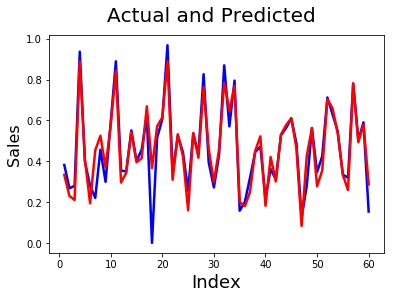

In [97]:
#Actual vs Predicted
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,Y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)      

Text(0, 0.5, 'ytest-ypred')

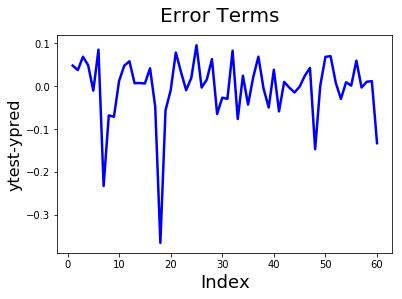

In [98]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,Y_test-Y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [105]:
#build model using without using standardize and normalize
data3=data.copy()
Y=data3['Sales']
del data3['Sales']
X=data3.copy()

In [106]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y,test_size = 0.3, random_state=0)
Lr=LinearRegression()
model=Lr.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
r2_Score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)

In [107]:
r2_Score

0.8653859164261077

In [108]:
mse

3.678169418540347

In [109]:
Lr.intercept_

2.8653040229264057

In [110]:
pd.DataFrame(Lr.coef_,X_test.columns,columns=['Coefficient'])

,Coefficient
TV,0.043918
Radio,0.200054
Newspaper,0.002590


In [111]:
Y_test.head()

18     11.3
170     8.4
107     8.7
98     25.4
177    11.7
Name: Sales, dtype: float64

In [113]:
Y_pred

array([10.05292053,  7.42948078,  6.95558837, 24.18319059, 11.99171653,
        6.5507274 , 13.18303065, 14.89289567, 11.0854496 , 16.24149473,
       23.02501332,  9.12266224, 10.28447148, 15.35880707, 11.619823  ,
       12.09532362, 18.54646007, 10.84070661, 16.14699716, 17.19261607,
       24.25138791,  9.43038721, 15.13811694, 12.41989529,  5.67044991,
       15.22556173, 12.18421993, 20.94164372, 13.22343087,  9.22118676,
       13.31791308, 21.63622242, 18.06962297, 21.14237203,  6.75435973,
        6.167833  ,  7.99509824, 13.11750543, 14.86388839,  6.24077626,
       12.36096037,  9.18555041, 15.03536809, 16.21929683, 17.19567498,
       13.31900867,  3.6786267 , 12.50287783, 15.9207696 ,  8.68852409,
       10.63036332, 19.55919032, 18.35049748, 15.24382125, 10.04317676,
        8.16946423, 21.50225309, 14.1416224 , 16.3017129 ,  8.9146567 ])

In [114]:
Y_test-Y_pred

18     1.247079
170    0.970519
107    1.744412
98     1.216809
177   -0.291717
182    2.149273
5     -5.983031
146   -1.692896
12    -1.885450
152    0.358505
61     1.174987
125    1.477338
180    0.215529
154    0.241193
80     0.180177
7      1.104676
33    -1.146460
130   -9.240707
37    -1.446997
74    -0.192616
183    1.948612
145    0.869613
45    -0.238117
159    0.480105
60     2.429550
123   -0.025562
179    0.415780
185    1.658356
122   -1.623431
44    -0.721187
16    -0.817913
55     2.063778
150   -1.969623
111    0.657628
22    -1.154360
189    0.532167
129    1.704902
4     -0.217505
83    -1.263888
106    0.959224
134   -1.560960
66     0.314450
26    -0.035368
113   -0.319297
168   -0.095675
63     0.680991
8      1.121373
75    -3.802878
118   -0.020770
143    1.711476
71     1.769637
124    0.140810
184   -0.750497
97     0.256179
149    0.056823
24     1.530536
30    -0.102253
160    0.258378
40     0.298287
56    -3.414657
Name: Sales, dtype: float64

Text(0, 0.5, 'Index')

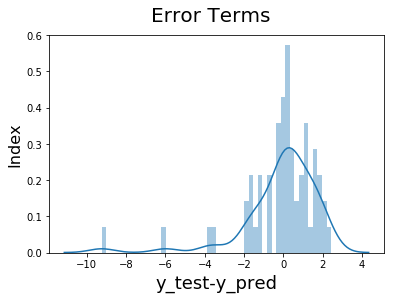

In [115]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((Y_test-Y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label